# Guía 7

## Ejercicio 2

Suponga que un viajante tiene que visitar n ciudades en el menor tiempo posible. Considere una matriz D de tamaño $n × n$ cuyos elementos $d_{pq}$ denotan la distancia entre cada par de ciudades (p, q). Se define un recorrido como una trayectoria cerrada que visita cada ciudad una y s ́olo una vez (a excepción de la ciudad de partida, a la cual debe regresar). El problema consiste en hallar el recorrido de mínima longitud.

Implemente el algoritmo de sistema de hormigas y utilícelo para resolver el problema del agente viajero considerando los datos proporcionados en el archivo gr17.csv.

Analice el efecto de la tasa de evaporación (ρ) y de la cantidad de feromona depositada (τ) sobre los resultados de la búsqueda. Para esto ́ultimo compare el desempeño del algoritmo empleando los métodos global, local y uniforme para depósito de feromonas. Realice varias corridas con cada configuración experimental y considere el tiempo de búsqueda y la longitud de los caminos encontrados como medidas para comparar el desempeño. Construya una tabla comparativa con los resultados obtenidos.



In [10]:
import numpy as np  
from ACO import ACO

from prettytable import PrettyTable

G = np.loadtxt("./data/gr17.csv", delimiter=',')

cant_hormigas = 10
tasa_evaporacion = [0.1, 0.5, 0.9]
feromonas_depositadas = [0.1, 1, 10]
metodos = ['global', 'local', 'uniforme']
alpha = 1.0
beta = 1.0
max_it = 400
resultados = PrettyTable(["rho", "q", "metodo", "avg_time", "avg_dist", "avg_it", "last path"])
n_runs = 10

for rho in tasa_evaporacion:
    for q in feromonas_depositadas:
        for metodo in metodos:
            tiempos = []
            dists = []
            caminos = []
            its = []

            for run in range(n_runs):
                aco = ACO(cant_hormigas, rho, q, metodo, alpha, beta, max_it)
                total_time, best_length, best_path, it = aco.buscar(G, 0, 16)

                tiempos.append(total_time)
                dists.append(best_length)
                caminos.append(best_path)
                its.append(it)  
            
            avg_time = np.mean(tiempos)
            avg_dist = np.mean(dists)
            avg_it = np.mean(its)   

            # convertir camino a enteros nativos
            path_int = [int(n) for n in caminos[-1]]
            resultados.add_row([rho, q, metodo, f"{avg_time:.4f}", f"{avg_dist:.2f}", f"{avg_it:.2f}", str(path_int)])


print(resultados)
               




+-----+-----+----------+----------+----------+--------+-------------+
| rho |  q  |  metodo  | avg_time | avg_dist | avg_it |  last path  |
+-----+-----+----------+----------+----------+--------+-------------+
| 0.1 | 0.1 |  global  |  0.0199  |  113.80  |  8.40  |  [0, 6, 16] |
| 0.1 | 0.1 |  local   |  0.0224  |  113.80  |  8.50  |  [0, 6, 16] |
| 0.1 | 0.1 | uniforme |  0.0193  |  111.40  |  8.50  |  [0, 6, 16] |
| 0.1 |  1  |  global  |  0.0195  |  111.40  |  8.80  |   [0, 16]   |
| 0.1 |  1  |  local   |  0.0220  |  110.20  |  9.00  |  [0, 6, 16] |
| 0.1 |  1  | uniforme |  0.0157  |  113.80  |  7.90  |  [0, 6, 16] |
| 0.1 |  10 |  global  |  0.0207  |  116.20  |  8.50  |   [0, 16]   |
| 0.1 |  10 |  local   |  0.0176  |  110.20  |  8.10  |  [0, 6, 16] |
| 0.1 |  10 | uniforme |  0.0154  |  126.30  |  7.70  |  [0, 6, 16] |
| 0.5 | 0.1 |  global  |  0.0195  |  110.20  |  8.50  |   [0, 16]   |
| 0.5 | 0.1 |  local   |  0.0214  |  110.20  |  8.90  |  [0, 6, 16] |
| 0.5 | 0.1 | unifor

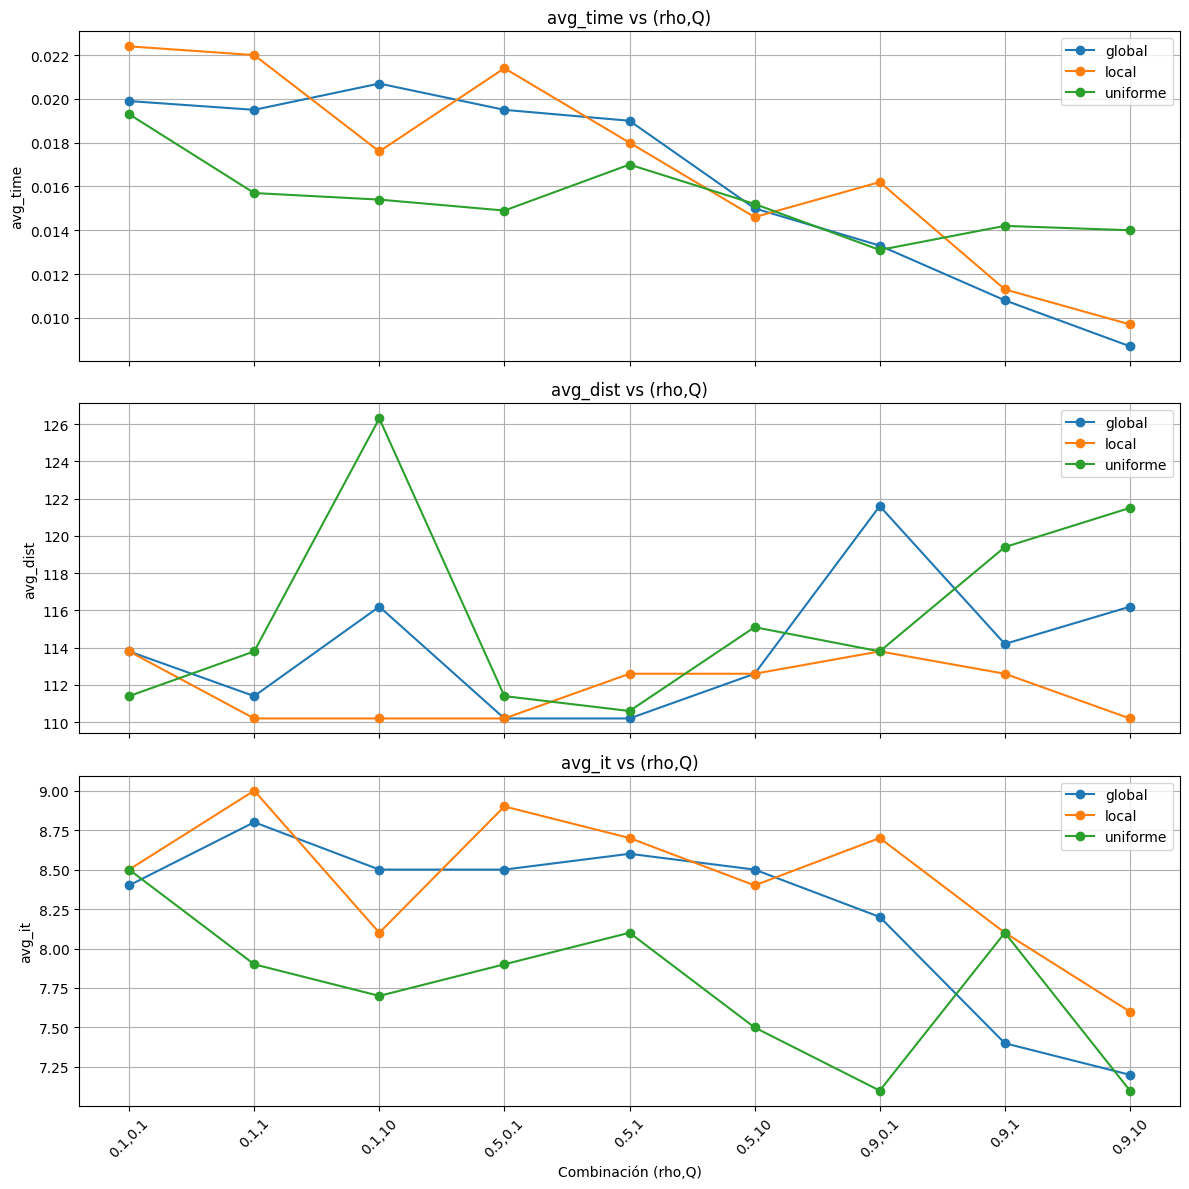

In [11]:
import matplotlib.pyplot as plt

# extraer valores únicos de rho y Q
rho_vals = sorted(set([row[0] for row in resultados._rows]))
Q_vals   = sorted(set([row[1] for row in resultados._rows]))
metodos  = sorted(set([row[2] for row in resultados._rows]))

# generar etiquetas combinadas de parámetros
param_labels = [f"{rho},{q}" for rho in rho_vals for q in Q_vals]

# preparar diccionarios para cada métrica y método
metrics = ['avg_time', 'avg_dist', 'avg_it']
data = {metric: {metodo: [] for metodo in metodos} for metric in metrics}

# llenar datos
for rho in rho_vals:
    for q in Q_vals:
        for metodo in metodos:
            row = [r for r in resultados._rows if r[0]==rho and r[1]==q and r[2]==metodo][0]
            data['avg_time'][metodo].append(float(row[3]))
            data['avg_dist'][metodo].append(float(row[4]))
            data['avg_it'][metodo].append(float(row[5]))

# --- plot ---
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)
for i, metric in enumerate(metrics):
    ax = axes[i]
    for metodo in metodos:
        ax.plot(param_labels, data[metric][metodo], marker='o', label=metodo)
    ax.set_ylabel(metric)
    ax.set_title(f"{metric} vs (rho,Q)")
    ax.grid(True)
    ax.legend()

axes[-1].set_xlabel("Combinación (rho,Q)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
